     Time  Spearmint Moisture %  Dill Moisture %  Temp(F)  Humidity %  \
0      85                    78               76    66.20          66   
1  180136                    79               76    66.20          66   
2  360192                    79               75    66.02          68   
3  540247                    79               76    65.84          70   
4  720302                    79               76    65.66          70   

   Heat Index(F) Light?  
0          13.70     ON  
1          13.70     ON  
2          13.69     ON  
3          13.67     ON  
4          13.56     ON  
78.19076923076923
75.51846153846154
63.72764227642276
89.8150406504065
79.9127358490566
92.36792452830188


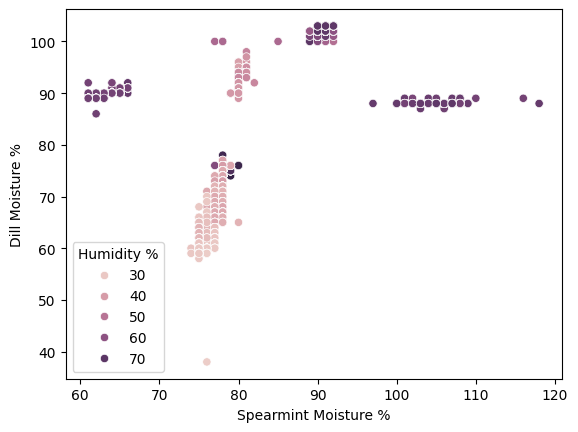

In [8]:
import pandas as pd
import seaborn as sns
import scipy as sp
import math
data = pd.read_csv('data.csv')
data[[ 'Spearmint Moisture %', 'Dill Moisture %', 'Temp(F)', 'Humidity %', 'Heat Index(F)'] ]= data[['Spearmint Moisture %', 'Dill Moisture %', 'Temp(F)', 'Humidity %', 'Heat Index(F)']].apply(pd.to_numeric) 
print(data.head())
time = data['Time']
spearmint_moisture = data['Spearmint Moisture %']
dill_moisture = data['Dill Moisture %']
temp = data['Temp(F)']
humidity = data['Humidity %']
heat_index = data['Heat Index(F)']
light_bool = data['Light?']
spearmint_moisture_int = []
sns.scatterplot(data = data, x= spearmint_moisture, y = dill_moisture, hue = humidity)

light_on_spearmint = []
light_on_dill = []
spear = []
dill = []
for i in range(0, len(time)-1):
    if light_bool[i] == 'ON':
        spear.append(int(spearmint_moisture[i]))
        dill.append(int(dill_moisture[i]))
        
        if light_bool[i+1] == 'OFF' or i+1 == len(time)-1:
            light_on_spearmint.append(spear)
            light_on_dill.append(dill)
            spear = []
            dill = []



#Now, calculate average spear and dill moisture approximations
#When light is ON
spear_averages = []
dill_averages = []

#Integrated average of spearmint moisture
for i in range(0, len(light_on_spearmint)):
    div = (len(light_on_spearmint[i]))
    c = []
    for j in light_on_spearmint[i]:
        c.append(j)
    print(sp.integrate.trapezoid(c)/div)
    c = []
    for j in light_on_dill[i]:
        c.append(j)
    (sp.integrate.trapezoid(c)/div)